# Matplotlib 进阶
## 第三章 - 画有效图
    3.1 概览
    3.2 直方图
    3.3 散点图
    3.4 折线图
    3.5 饼状图
    3.6 同理心
    
本文来自 公众号:王的机器
https://mp.weixin.qq.com/s/b8IAf-liXvgn50-3HwT1VA

In [ ]:
'''
香饽饽： 
不要运行此笔记本，本文用到的库似乎维护不佳，代码内存在漏洞，运行可能报错！
'''

# 画有效图

### 在做图表设计时候经常面临着怎么选用合适的图表，图表展示的关系分为四大类 (点击下图放大)：
  - 分布 (distribution)
  - 联系 (relationship)
  - 比较 (comparison)
  - 构成 (composition)
    
  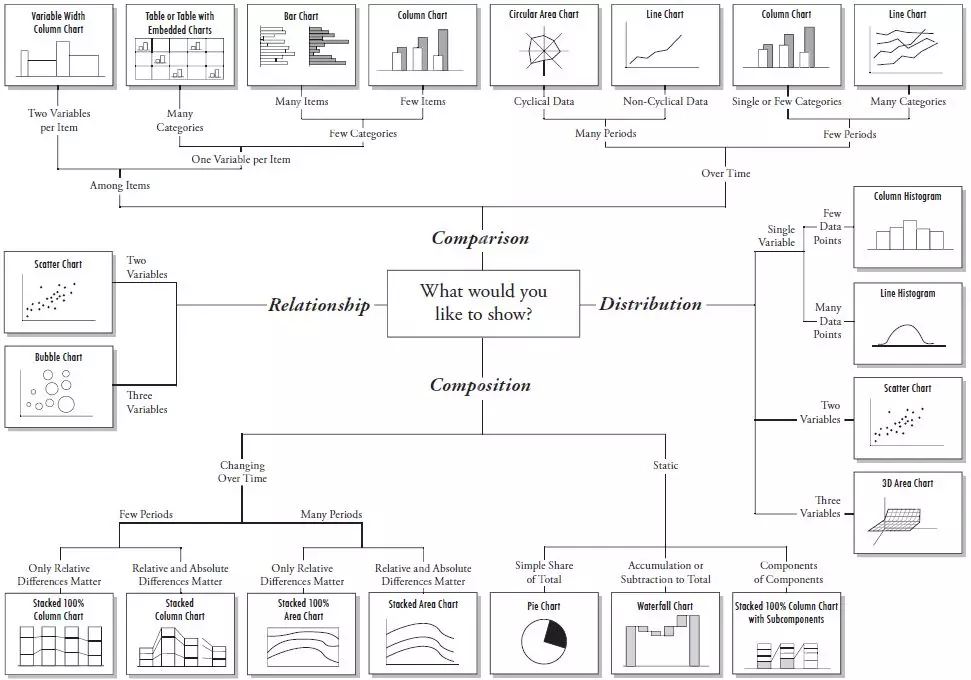
  
  
  

### 在选用图表前首先要想清楚：你要表达什么样的数据关系。上面的图表分类太过繁多，接下来我们只讨论在量化金融中用的最多的几种类型，即

- 用直方图来展示股票价格和收益的分布
- 用散点图来展示两支股票之间的联系
- 用折线图来比较汇率在不同窗口的移动平均线
- 用饼状图来展示股票组合的构成成分

### 首先用 YahooFinancials API 来下载若干资产的一年历史数据 (安装该 API 用 pip install yahoofinancials)：

- 起始日：2018-04-29
- 终止日：2019-04-29
- 五只股票：英伟达、亚马逊、阿里巴巴、脸书、苹果
- 三个汇率：欧元美元、美元日元、美元人民币



- 下面代码就是从 API 获取数据，股票用的是股票代号 (stock code)，而货币用的该 API 要求的格式，比如「欧元美元」用 EURUSD=X，而不是市场常见的 EURUSD，而「美元日元」用 JPY=X 而不是 USDJPY。

In [17]:
from yahoofinancials import YahooFinancials
start_date =  '2018-04-29'
end_date =  '2019-04-29'

stock_code = ['NVDA', 'AMZN', 'BABA', 'FB', 'AAPL']

currency_code = ['EURUSD=X', 'JPX=X', 'CNY=X'   ]
stock = YahooFinancials(stock_code)
currency = YahooFinancials(currency_code)

stock_daily = stock.get_historical_price_data(start_date, end_date, 'daily')

currency_daily = currency.get_historical_price_data(start_date, end_date, 'daily')

#该 API 返回结果 stock_daily 和 currency_daily 是「字典」格式 (json)，样子非常丑陋，感受一下。

In [18]:
stock_daily

{'NVDA': {'eventsData': {'dividends': {'2018-05-23': {'amount': 0.15,
     'date': 1527082200,
     'formatted_date': '2018-05-23'},
    '2018-08-29': {'amount': 0.15,
     'date': 1535549400,
     'formatted_date': '2018-08-29'},
    '2018-11-29': {'amount': 0.16,
     'date': 1543501800,
     'formatted_date': '2018-11-29'},
    '2019-02-28': {'amount': 0.16,
     'date': 1551364200,
     'formatted_date': '2019-02-28'}}},
  'firstTradeDate': {'formatted_date': '1999-01-22', 'date': 917015400},
  'currency': 'USD',
  'instrumentType': 'EQUITY',
  'timeZone': {'gmtOffset': -14400},
  'prices': [{'date': 1525095000,
    'high': 229.0,
    'low': 224.1199951171875,
    'open': 226.99000549316406,
    'close': 224.89999389648438,
    'volume': 8196100,
    'adjclose': 223.30502319335938,
    'formatted_date': '2018-04-30'},
   {'date': 1525181400,
    'high': 227.25,
    'low': 222.1999969482422,
    'open': 224.57000732421875,
    'close': 227.13999938964844,
    'volume': 6344700,
    

In [19]:
#学过 Pandas 之后，我们应该可以把上面的「原始数据」转换成 DataFrame，代码如下：
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


def data_converter( price_data, code, asset):
    #conv to df
    if asset == 'FX':
#完全是为了 YahooFinancial 里面的输入格式准备的。如果 Asset 是股票类，直接用其股票代码；如果 Asset 是汇率类，一般参数写成 EURUSD 或 USDJPY
        code = str(code[3:] if code[:3]=='USD' else code) + '=X'
    columns= ['open','close','low','high']  #开盘价、收盘价、最低价和最高价的标签
    price_dict = price_data[code]['prices']
    index = [p['formatted_date'] for p in price_dict]
    price = [ [p[c] for c in columns ] for p in price_dict]
    
    data = pd.DataFrame( price, index = pd.Index(index, name='date'), columns = pd.Index(columns, name = 'OHLC'))
    
#     值为第 9 行得到的 price 列表
#     行标签为第 8 行得到的 index 列表
#     列标签为第 6 行定义好的 columns 列表

    return data

In [20]:
#处理过后的数据格式美如画，不信你看 (用 EURUSD 和 NVDA 举例)

EURUSD = data_converter( currency_daily, 'EURUSD', 'FX' )
EURUSD.head(3).append(EURUSD.tail(3))


OHLC,open,close,low,high
date,,,,
2018-04-29,1.212856,1.212283,1.206636,1.213857
2018-04-30,1.208313,1.208123,1.198351,1.208459
2018-05-01,1.199213,1.199156,1.195414,1.203109
2019-04-24,1.115698,1.115349,1.112174,1.116400
2019-04-25,1.113710,1.113685,1.112298,1.117281
2019-04-28,1.114902,1.115026,1.114554,1.116994


In [21]:
NVDA = data_converter( stock_daily, 'NVDA',' EQ' )
NVDA.head(3).append(NVDA.tail(3))

OHLC,open,close,low,high
date,,,,
2018-04-30,226.990005,224.899994,224.119995,229.000000
2018-05-01,224.570007,227.139999,222.199997,227.250000
2018-05-02,227.000000,226.309998,225.250000,228.800003
2019-04-24,191.089996,191.169998,188.639999,192.809998
2019-04-25,189.550003,186.910004,183.699997,190.449997
2019-04-26,180.710007,178.089996,173.300003,180.889999


# 直方图
### 直方图 (histogram chart)，又称质量分布图，是一种统计报告图，由一系列高度不等的纵向条纹或线段表示数据分布的情况。 一般用横轴表示数据类型，纵轴表示分布情况。在 Matplotlib 里的语法是
   - plt.hist()
   - ax.hist()
   
   
### 我们先看看英伟达 (NVDA) 的价格分布。


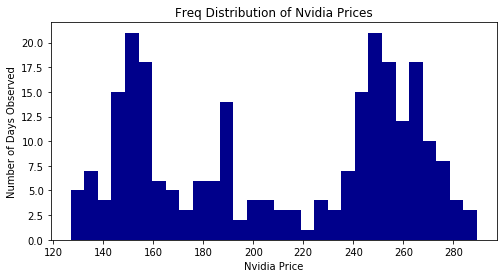

In [22]:
p_NVDA = NVDA['close']

fig = plt.figure( figsize=(8,4))

plt.hist( p_NVDA, bins = 30, color ='darkblue') 
#p_NVDA：Series，也可以是 list 或者 ndarray
#bins：分成多少堆

plt.xlabel('Nvidia Price')
plt.ylabel('Number of Days Observed')
plt.title('Freq Distribution of Nvidia Prices')


plt.show()


- 从上图可看出，NVDA 的价格分布在有 220 划分的两个范围 (regime)。在 2018 年 11 月 16 日 (星期五)，英伟达第三季度的报表低于预期，那么股价暴跌 19%，在之后的星期一，又跌 12%，两个交易日股价一下子从原来的 220 左右跌到 150。

- 在研究股票价格序列中，由于收益率有些好的统计性质，我们对其更感兴趣，接下来再看看英伟达 (NVDA) 的对数收益 (log-return) 的分布。


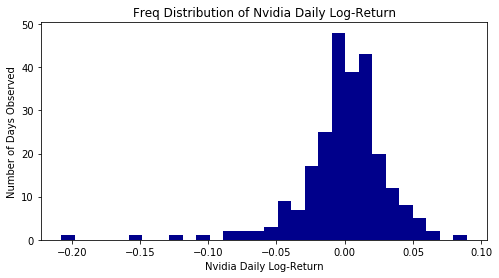

In [23]:
date = p_NVDA.index
price = p_NVDA.values
r_NVDA = pd.Series(np.log(price[1:]/price[:-1]), index= date[1:])
#转换为收益率
#首先对数收益的计算公式为
#   r(t) = ln(P(t)/P(t-1)

#得到 r_NVDA。计算一天的收益率需要两天的价格，因此用 p_NVDA 计算 r_NVDA 时，会丢失最新一天的数据，因此我们用 date[1:] 作为 r_NVDA 的行标签 (index)。



fig = plt.figure( figsize=(8,4))

plt.hist( r_NVDA, bins = 30, color ='darkblue') 
#p_NVDA：Series，也可以是 list 或者 ndarray
#bins：分成多少堆

plt.xlabel('Nvidia Daily Log-Return')
plt.ylabel('Number of Days Observed')
plt.title('Freq Distribution of Nvidia Daily Log-Return')


#对数收益率的分布像一个正态分布 (人人都喜欢正态分布)。

plt.show()


# 散点图
### 散点图 (scatter chart) 用两组数据构成多个坐标点，考察坐标点的分布，判断两变量之间是否存在某种联系的分布模式。在 Matplotlib 里的语法是
    - plt.scatter()
    - ax.scatter()

- 我们看看中美两大电商亚马逊 (AMZN) 和阿里巴巴 (BABA) 之间的价格和对数收益率的联系。

In [24]:
AMZN = data_converter( stock_daily, 'AMZN',' EQ' )
BABA = data_converter( stock_daily, 'BABA',' EQ' )

p_AMZN = AMZN['close']

date = p_AMZN.index
price = p_AMZN.values
r_AMZN = pd.Series(np.log(price[1:]/price[:-1]), index= date[1:])


p_BABA = BABA['close']

date = p_BABA.index
price = p_BABA.values
r_BABA = pd.Series(np.log(price[1:]/price[:-1]), index= date[1:])


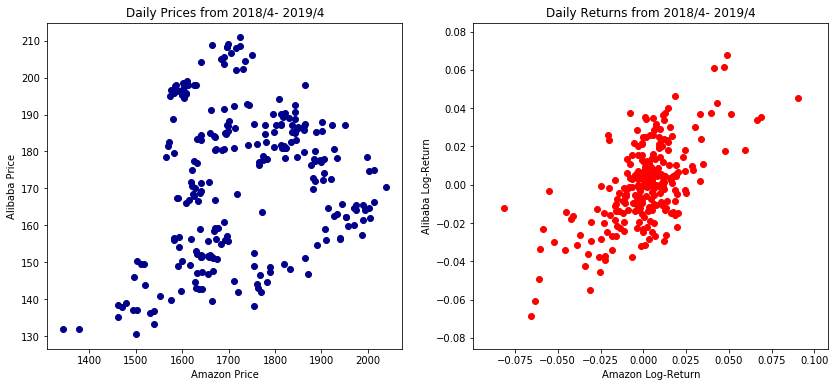

In [25]:
#用两个子图分别展示「价格」和「收益率」的散点图。
fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize=(14,6))

axes[0].scatter(p_AMZN, p_BABA, color='darkblue')
axes[0].set_xlabel('Amazon Price')
axes[0].set_ylabel('Alibaba Price')
axes[0].set_title('Daily Prices from 2018/4- 2019/4')


axes[1].scatter(r_AMZN, r_BABA, color='red')
axes[1].set_xlabel('Amazon Log-Return')
axes[1].set_ylabel('Alibaba Log-Return')
axes[1].set_title('Daily Returns from 2018/4- 2019/4')

plt.show()

#从右图来看，亚马逊和阿里巴巴在这段时期的表现正相关，如果做线性回归是一条斜率为正的线。

# 折线图
- 折线图 (line chart) 显示随时间而变化的连续数据，因此非常适用于显示在相等时间间隔下数据的趋势。在 Matplotlib 里的语法是
  - plt.plot()
  - ax.plot()


- 我们来看看如何画 EURUSD 的 20 天和 60 天移动平均 (moving average, MA) 线

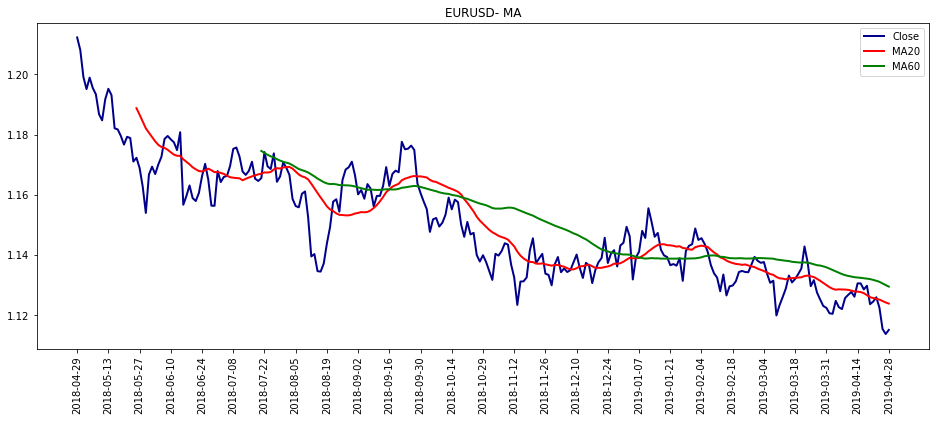

In [26]:
#首先获取 EURUSD 的收盘价。

curr = 'EURUSD'
EURUSD = data_converter(currency_daily, curr, 'FX')
rate = EURUSD['close']


#用 Pandas 里面的 rolling() 函数来计算 MA，在画出收盘价，MA20 和 MA60 三条折线。
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()

ax.set_title( curr+ '- MA')
ax.set_xticks( range(0, len(rate.index), 10 ))
ax.set_xticklabels([rate.index[i] for i in ax.get_xticks()], rotation=90)

ax.plot(rate, color='darkblue', linewidth = 2, label = 'Close')

ma20 = rate.rolling(20).mean()
ma60 = rate.rolling(60).mean()

ax.plot( ma20, color = 'red', linewidth =2, label='MA20')
ax.plot( ma60, color = 'green', linewidth =2, label='MA60')

ax.legend(loc=0)

#上面代码最关键的就是第 10 和 11 行，用 rolling(n) 函数对 rate 求 n 天移动均值。
#从图中注意到绿色的 MA60最短，红色的 MA20 其次。原因很简单，假如一年有 252 个交易日，
#那么第 1 个 MA60 值需要第 1 到 60 个汇率，第 2 个 MA60 值需要第 2 到 61 个汇率，
#第 193 个 MA60 值需要第 193 到 252 个汇率。最终只有 193 个 MA60。同理可得到只有 223 个 MA20。


# 饼状图
- 饼状图 (pie chart) 是一个划分为几个扇形的圆形统计图表，用于描述量、频率或百分比之间的相对关系。 在饼状图中，每个扇区面积大小为其所表示的数量的比例。在 Matplotlib 里的语法是
  - plt.pie()
  - ax.pie()

- 我们来看看如何画出一个股票投资组合在 2019 年 4 月 26 日的饼状图，假设组合里面有 100 股英伟达，20 股亚马逊，50 股阿里巴巴，30 股脸书和 40 股苹果 (一个科技股爱好者的组合 )。

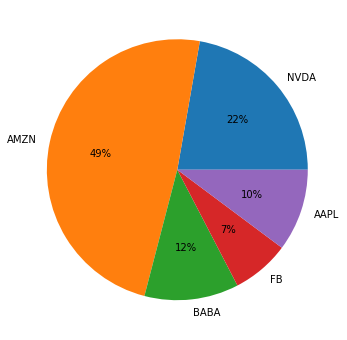

In [27]:
#首先计算组合里五支股票在 2019 年 4 月 26 日的市值 (market value, MV)。

stock_list = ['NVDA', 'AMZN', 'BABA', 'FB', 'AAPL']
date = '2019-04-26'

MV = [data_converter(stock_daily, code, 'EQ')['close'][date] for code in stock_list]
MV = np.array(MV) * np.array([100, 20, 50, 30, 40])
#第 4 行用了列表解析式来获取 stock_list 每支股票的价格，第 5 行将价格乘上数量得到市值。

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()

ax.pie(MV, labels= stock_list, autopct='%.0f%%')
#autopct：显示百分数的格式，str

plt.show()

# 为用户习惯考虑
- 把饼当成钟，大多数人习惯顺时针的看里面的内容，因此把面积最大的那块的一条边 (见下图) 放在 12 点的位置最能突显其重要性，之后按面积从大到小顺时针排列。
- 在画饼状图前，我们需要额外做两件事：
    - 按升序排列 5 只股票的市值
    - 设定 pie() 的相关参数达到上述「最大块放 12 点位置」的效果

In [28]:
idx = MV.argsort()[::-1]
MV = MV[idx]
stock_list = [ stock_list[i] for i in idx ]
print( MV )
print( stock_list )

[39012.60009766 17808.99963379  9354.49981689  8172.00012207
  5744.70016479]
['AMZN', 'NVDA', 'BABA', 'AAPL', 'FB']


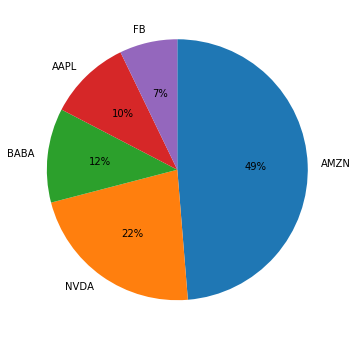

In [29]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()

ax.pie(MV, labels= stock_list, autopct='%.0f%%', startangle = 90, counterclock = False)
#autopct：显示百分数的格式，str
# startangle = 90 是说第一片扇形 的左边在 90 度位置
# counterclock = False 是说顺时针拜访每块扇形

plt.show()

# 柱状图
- 当饼状图里面扇形多过 5 个时，面积相近的扇形大小并不容易一眼辨别出来，不信看上图的 BABA 和 APPL，没看到数字很难看出那个面积大。
- 但绝大多数人是感官动物，图形和数字肯定先选择看图形，这个时候用柱状图 (bar chart) 来代替饼状图，每个市值成分大小一目了然 (好图就是能让用户能最快的抓住核心信息)。

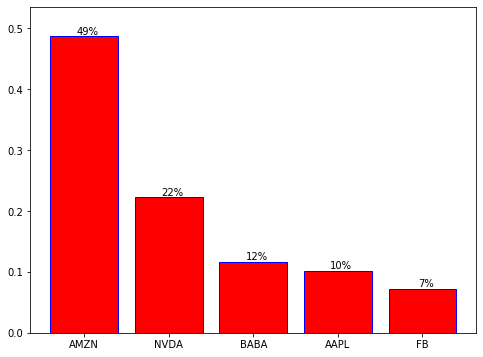

In [35]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

pct_MV = MV / np.sum(MV)
index = np.arange(len(pct_MV))

ax.bar( index, pct_MV, facecolor='red', edgecolor = 'blue')

ax.set_xticks(index)
ax.set_xticklabels(stock_list)

ax.set_ylim(0, np.max(pct_MV)*1.1 )

for x,y in zip (index, pct_MV):
  ax.text (x+0.04, y+0.05/100, '{0:.0%}'.format(y), ha='center', va = 'bottom')
#ax.pie(MV, labels= stock_list, autopct='%.0f%%', startangle = 90, counterclock = False)
#autopct：显示百分数的格式，str
# startangle = 90 是说第一片扇形 的左边在 90 度位置
# counterclock = False 是说顺时针拜访每块扇形

plt.show()

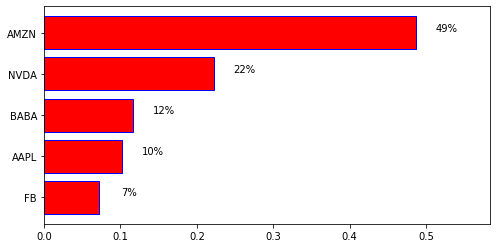

In [41]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()

pct_MV = MV[::-1] / np.sum(MV)
index = np.arange(len(pct_MV))


#用横向柱状图 (horizontal bar chart)，函数为 ax.barh()。代码和上面非常类似，就是把横轴和纵轴的调换了一下。
ax.barh( index, pct_MV, facecolor='red', edgecolor = 'blue')

ax.set_yticks(index)
ax.set_yticklabels(stock_list[::-1])

ax.set_xlim(0, np.max(pct_MV)*1.2 )

for x,y in zip ( pct_MV, index):
  ax.text (x+0.04, y+0.05/100, '{0:.0%}'.format(x), ha='center', va = 'bottom')
#ax.pie(MV, labels= stock_list, autopct='%.0f%%', startangle = 90, counterclock = False)
#autopct：显示百分数的格式，str
# startangle = 90 是说第一片扇形 的左边在 90 度位置
# counterclock = False 是说顺时针拜访每块扇形

plt.show()

In [42]:
#Matplotlib 里面有专门为色盲考虑的色彩风格，首先用下列语句看查看所有的色彩风格。
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [44]:
#看从 R 中借用过来的大名鼎鼎的 ggplot 的效果。
plt.style.use('ggplot')
#色盲模式  seaborn-colorblind 
plt.style.use('seaborn-colorblind')

# 挑战3 Quiz-3
### 尝试利用上面的数据生成一张 以下效果图.  (使用色盲模式  seaborn-colorblind )

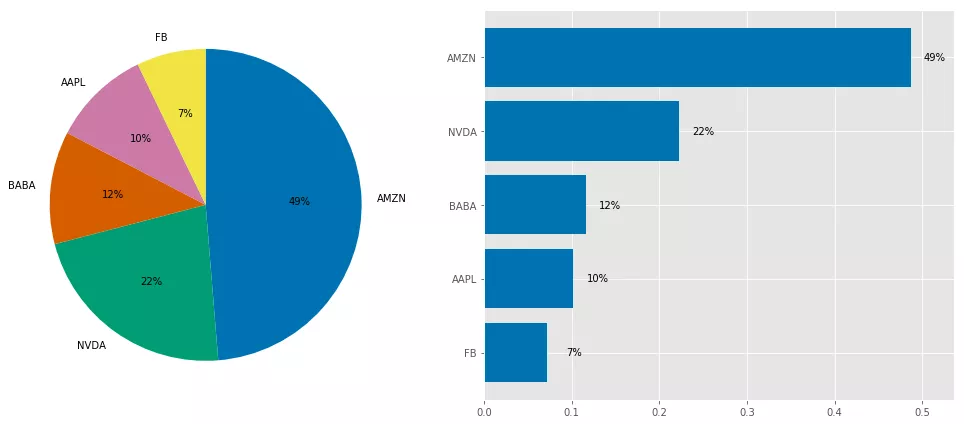

In [45]:
#Your answer here